In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# min-max normalization

def min_max_norm(col):
    minimum = col.min()
    range = col.max() -minimum
    return (col-minimum)/range

def normalized_values(df, norm_funct):
    df_norm = pd.DataFrame()
    for column in df: 
        df_norm[column] = norm_funct(df[column])
    return df_norm

# df_normalized = normalized_values(df, min_max_norm)

In [3]:
def decimal_scaling_norm(col):
    maximum = col.max()
    tenfold = 1
    while (maximum > tenfold):
        tenfold = tenfold * 10
    return(col/tenfold)
    
# df_normalized = normalized_values(df, decimal_scaling_norm)

# TODO: Make normalization functions

In [4]:
# pip install tensorflow
# pip install keras
# pip install livelossplot
# pip install pydot
# pip install graphviz


In [5]:
# Step 0: Install the packages & import the required libraries, functions,...
import numpy as np 
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow. keras.optimizers import Adam
from livelossplot import PlotLossesKeras
from keras.utils.vis_utils import plot_model

2021-10-14 20:30:10.991494: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-14 20:30:10.991516: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
# Step 1: Upload the dataset and inspect the data
xor_data = pd.DataFrame({'P1': [0,1,0,1], 'P2': [0,0,1,1], 'Q' : [0,1,1,0]})
x_xor_data= xor_data[['P1', 'P2']]
y_xor_data = xor_data[['Q']]

In [7]:
# Step 5: Build the ANN-model
inputs_xor = Input(shape=(2,))
x_xor = Dense(2, activation='sigmoid')(inputs_xor)  #sigmoid(x) = 1 / (1 + exp(-x)).
outputs_xor = Dense(1, activation='sigmoid')(x_xor)
model_xor = Model(inputs_xor, outputs_xor, name='XOR_NN')
# you can visualise the model in different ways –see next slide
model_xor.compile(optimizer=Adam(learning_rate=0.00001),loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

2021-10-14 20:30:14.526988: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-14 20:30:14.527027: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dell-xps-15-9500-ruben): /proc/driver/nvidia/version does not exist
2021-10-14 20:30:14.527433: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


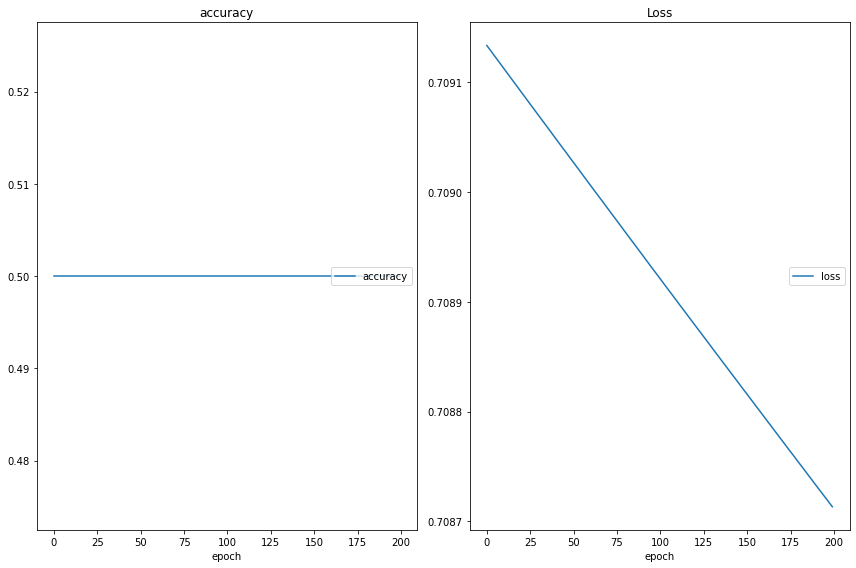

accuracy
	accuracy         	 (min:    0.500, max:    0.500, cur:    0.500)
Loss
	loss             	 (min:    0.709, max:    0.709, cur:    0.709)


In [8]:
# Step 6: Train the ANN-model
history_xor = model_xor.fit(x_xor_data, y_xor_data, epochs=200, callbacks=[PlotLossesKeras()], verbose=False)

Model: "XOR_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


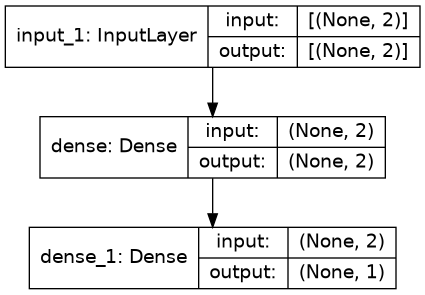

In [9]:
# Visualisation of the ANN-model 
model_xor.summary();
plot_model(model_xor, to_file='model_xor_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# Visualisation of the values of the trained ANN-model
for lay in model_xor.layers:
    print(lay.name)
    print(lay.get_weights())

input_1
[]
dense
[array([[ 0.20331708,  0.31319937],
       [ 0.6758041 , -0.94198936]], dtype=float32), array([-0.00199051,  0.00199469], dtype=float32)]
dense_1
[array([[ 1.186316 ],
       [-1.0137342]], dtype=float32), array([-0.00199158], dtype=float32)]


In [11]:
# Step 7: Evaluate the quality of the ANN-model
model_xor.predict(x_xor_data)
model_xor.evaluate(x_xor_data, y_xor_data)

1/1 [==============================] - 0s 85ms/step - loss: 0.7087 - accuracy: 0.5000


[0.7087111473083496, 0.5]